# **Heart Disease Prediction Using Machine Learning**<br><br>



---
# **About Data Set**
---

- ### **Source**<br><br>
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 16 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

- ### **Description**<br>

**Demographic**<br><br>
• Sex: male or female(Nominal)<br>
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)<br>
<br>**Behavioral**<br><br>
• Education: 0: Less than High School and High School degrees, 1: College Degree and Higher<br>
• Current Smoker: whether or not the patient is a current smoker (Nominal)<br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
<br>**Medical(history)**<br><br>
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)<br>
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)<br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes (Nominal)<br>
<br>**Medical(current)**<br><br>
• Tot Chol: total cholesterol level (Continuous)<br>
• Sys BP: systolic blood pressure (Continuous)<br>
• Dia BP: diastolic blood pressure (Continuous)<br>
• BMI: Body Mass Index (Continuous)<br>
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• Glucose: glucose level (Continuous)<br>
<br>**Predict variable (desired target)**<br><br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>


- ### **Data Source References**<br><br>
  
Link is: https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset





In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




# 1) **Reading Data** 

In [91]:
df=pd.read_csv('heart_disease_dataset.csv')

In [92]:
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


The dataset has been successfully loaded, and the table above shows the first few rows. It includes various health-related metrics such as age, education, smoking status, medical history, and risk factors for coronary heart disease (CHD).

In [93]:
df.shape

(4240, 16)

Initially this dataset has 4240 observations and 16 features.

In [94]:
df.sample(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
564,1,42,4.0,0,0.0,0.0,0,0,0,253.0,116.0,72.0,21.96,60.0,88.0,0
2266,1,41,2.0,1,20.0,0.0,0,0,0,199.0,139.0,80.0,25.51,62.0,62.0,1
3861,0,64,3.0,0,0.0,0.0,0,1,0,200.0,151.0,90.0,21.99,70.0,87.0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [96]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [97]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

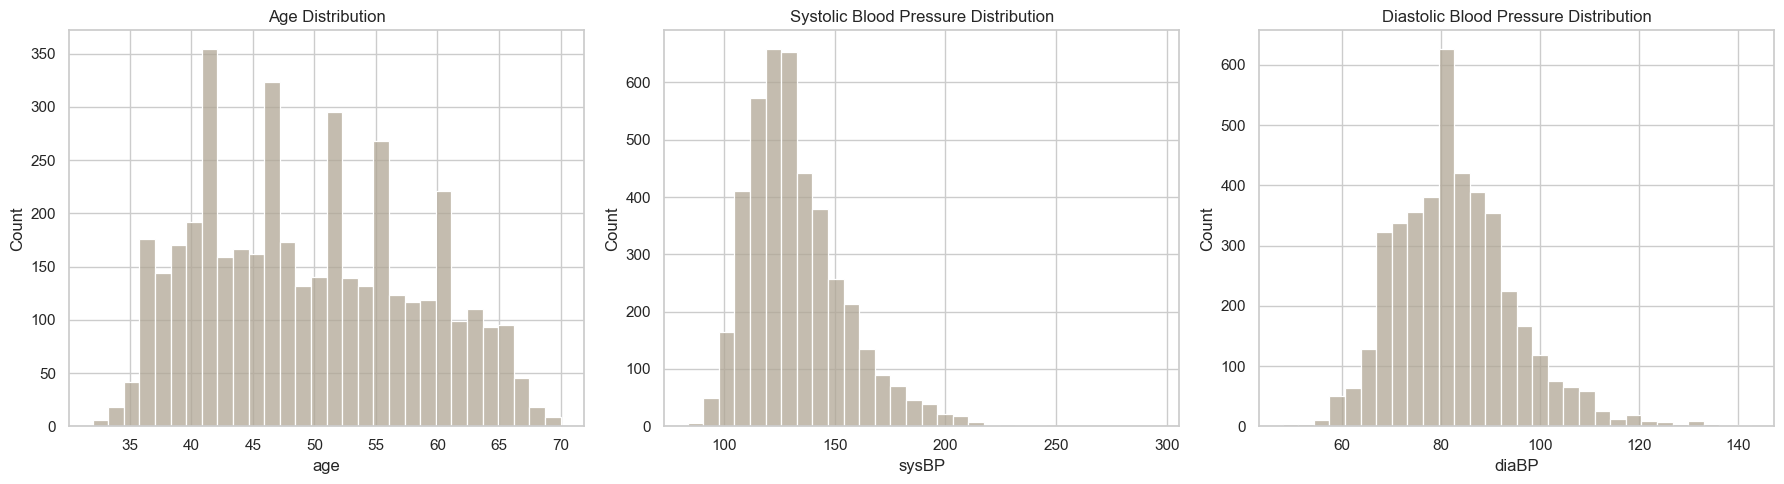

In [98]:

sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=30, kde=False, ax=axes[0],color='#B0A695')
axes[0].set_title('Age Distribution')



sns.histplot(df['sysBP'].dropna(), bins=30, kde=False, ax=axes[1] ,color='#B0A695')
axes[1].set_title('Systolic Blood Pressure Distribution')

sns.histplot(df['diaBP'].dropna(), bins=30, kde=False, ax=axes[2],color='#B0A695')
axes[2].set_title('Diastolic Blood Pressure Distribution')

plt.tight_layout()
plt.show()


The above plot is showing visualizations of some of the distributions of key variables to provide a better understanding of the data.


# **2) Data Preprocessing**

- ## **Handling Null Values**

In [99]:
missing_values = df.isnull().sum()
missing_values


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

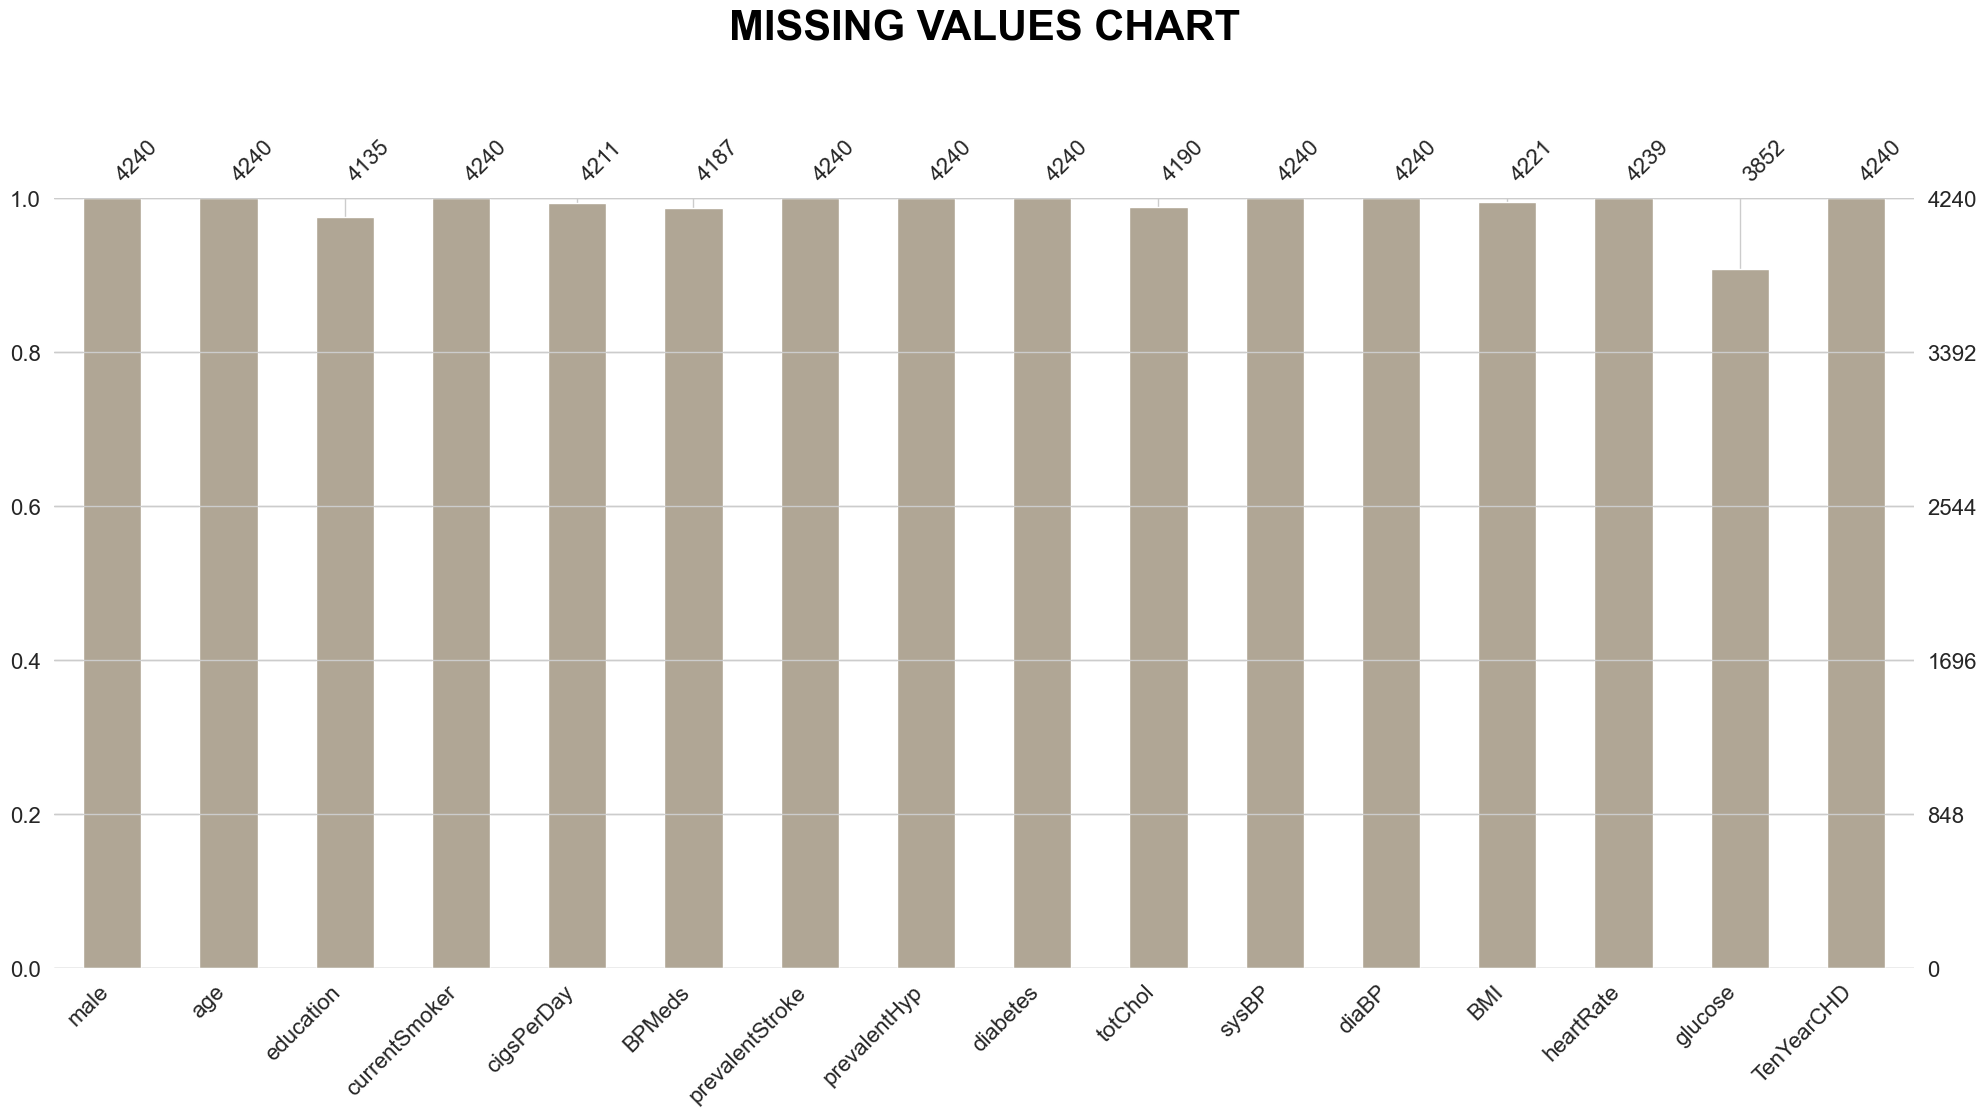

In [100]:
msno.bar(df,color='#B0A695')
plt.title('MISSING VALUES CHART\n\n', color='black', fontsize=30, fontweight='bold')
plt.show()

The table above shows the count of missing values for each variable in the dataset. Some variables like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' have missing values that need to be addressed during preprocessing



- **Inspecting male column**

In [101]:
df['male'].value_counts()

male
0    2420
1    1820
Name: count, dtype: int64

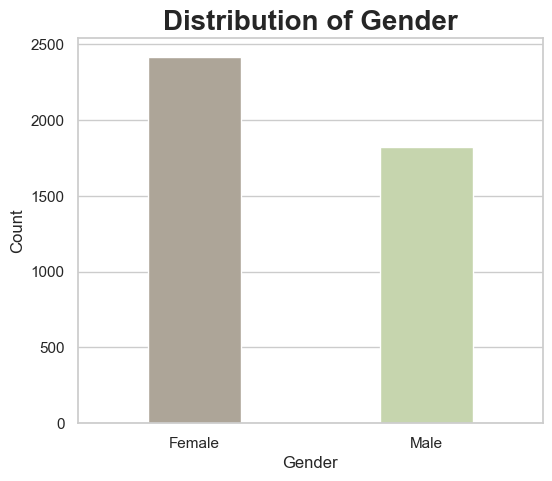

In [102]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x=df['male'],palette=['#B0A695','#C7DCA7'],width=0.4)
ticks = plt.xticks()[0]
labels = ['Female','Male']
plt.xticks(ticks, labels)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender',fontsize=20, fontweight='bold')
plt.show()

- **Inspecting age column**

In [103]:
df['age'].value_counts()

age
40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: count, dtype: int64

- **Inspecting education column**

In [104]:
df['education'].value_counts()

education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64

In [105]:
df.drop('education',inplace=True,axis=1)

As education column is not directly necessary for our model Prediction that is why i removed complete education feature.

- **Inspecting currentSmoker column**

In [106]:
df['currentSmoker'].value_counts()

currentSmoker
0    2145
1    2095
Name: count, dtype: int64

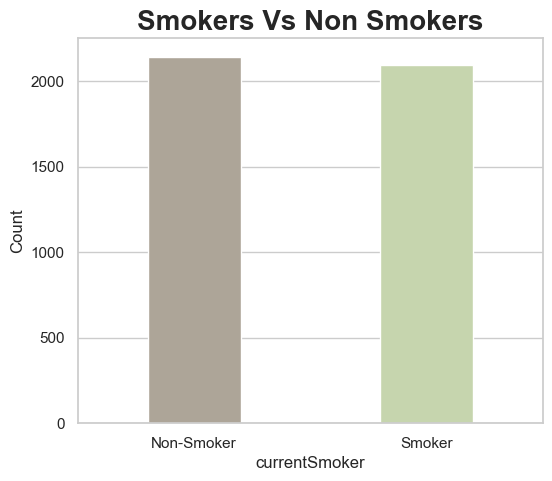

In [107]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x=df['currentSmoker'],palette=['#B0A695','#C7DCA7'],width=0.4)
ticks = plt.xticks()[0]
labels = ['Non-Smoker','Smoker']
plt.xticks(ticks, labels)
plt.ylabel('Count')
plt.title('Smokers Vs Non Smokers',fontsize=20, fontweight='bold')
plt.show()

- **Inspecting cigsPerDay column**

In [108]:
df['cigsPerDay'].value_counts()


cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [109]:
df['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [110]:
print('Total Null values are:',df['cigsPerDay'].isnull().sum())
print('The minimum number of cigarettes a man smokes is:', df['cigsPerDay'].min())
print('The maximum number of cigarettes a man smokes is:', df['cigsPerDay'].max())
print('Average number of cigarettets a man smoke is:',df['cigsPerDay'].mean())


Total Null values are: 29
The minimum number of cigarettes a man smokes is: 0.0
The maximum number of cigarettes a man smokes is: 70.0
Average number of cigarettets a man smoke is: 9.005936832106388


In [111]:
# By using Scikit-learn's SimpleImputer, we can replace the missing values with the mean of the column.
fillMissValues=SimpleImputer(strategy='mean')
df['cigsPerDay']=fillMissValues.fit_transform(df[['cigsPerDay']])



# By using pandas, we can replace the missing values with the mean of the column.
# df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)

In [112]:
df['cigsPerDay'].isnull().sum()

0

In [113]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)

- **Inspecting BPMeds column**

In [114]:
df['BPMeds'].value_counts()

BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64

In [115]:
# Usage of Blood Pressure Medications.
print('Total number of null values:', df['BPMeds'].isnull().sum())

Total number of null values: 53


In [116]:
# By using Scikit-learn's SimpleImputer, we can replace the missing values with the median of the column.
fillMissValues=SimpleImputer(strategy='median')
df['BPMeds']=fillMissValues.fit_transform(df[['BPMeds']])

# By using pandas, we can replace the missing values with the median of the column.
# df['BPMeds'].fillna(df['BPMeds'].median(),inplace=True)

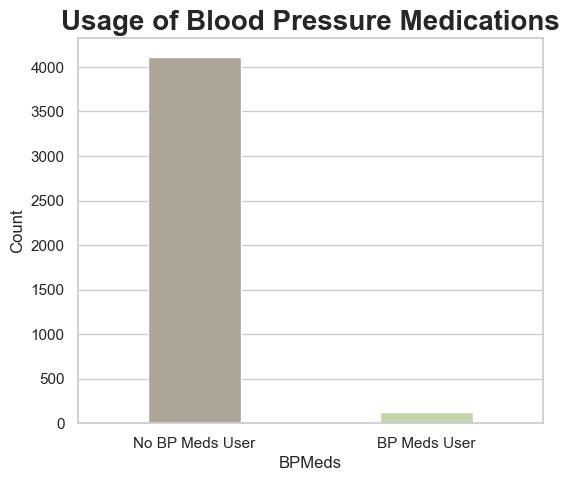

In [117]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x=df['BPMeds'],palette=['#B0A695','#C7DCA7'],width=0.4)
ticks = plt.xticks()[0]
labels = ['No BP Meds User','BP Meds User']
plt.xticks(ticks, labels)
plt.ylabel('Count')
plt.title('Usage of Blood Pressure Medications',fontsize=20, fontweight='bold')
plt.show()

- **Inspecting prevalentStroke column**

In [118]:
df['prevalentStroke'].value_counts()


prevalentStroke
0    4215
1      25
Name: count, dtype: int64

In [119]:
df['prevalentStroke'].isnull().sum()

0

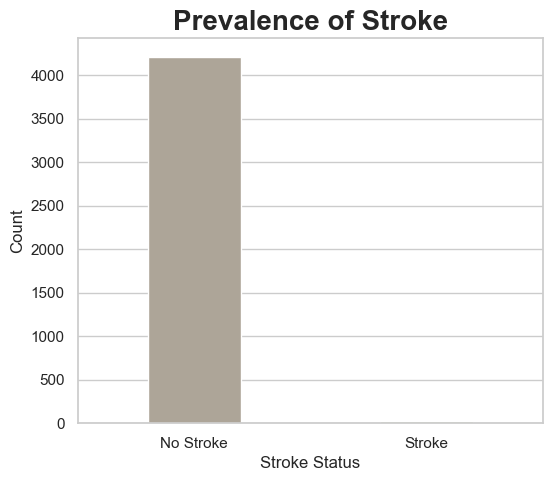

In [120]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x=df['prevalentStroke'], palette=['#B0A695','#C7DCA7'], width=0.4)
ticks = plt.xticks()[0]
labels = ['No Stroke', 'Stroke']
plt.xticks(ticks, labels)
plt.xlabel('Stroke Status')
plt.ylabel('Count')
plt.title('Prevalence of Stroke', fontsize=20, fontweight='bold')
plt.show()

- **Inspecting prevalentHyp column**

In [121]:
df['prevalentHyp'].value_counts()

prevalentHyp
0    2923
1    1317
Name: count, dtype: int64

In [122]:
df['prevalentHyp'].isnull().sum()

0

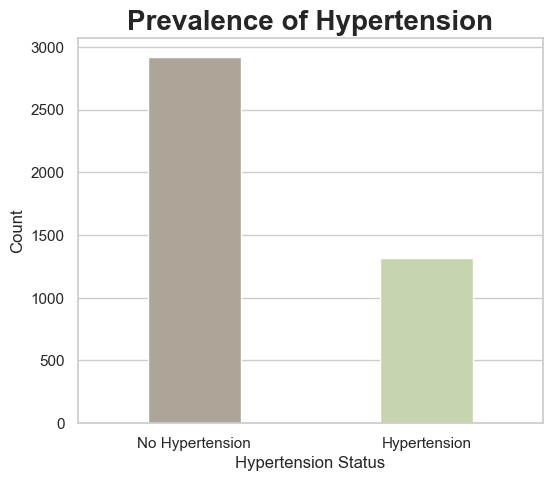

In [123]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x=df['prevalentHyp'], palette=['#B0A695','#C7DCA7'], width=0.4)
ticks = plt.xticks()[0]
labels = ['No Hypertension', 'Hypertension']
plt.xticks(ticks, labels)
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.title('Prevalence of Hypertension', fontsize=20, fontweight='bold')
plt.show()

- **Inspecting diabetes column**

In [124]:
df['diabetes'].value_counts()

diabetes
0    4131
1     109
Name: count, dtype: int64

In [125]:
df['diabetes'].isnull().sum()

0

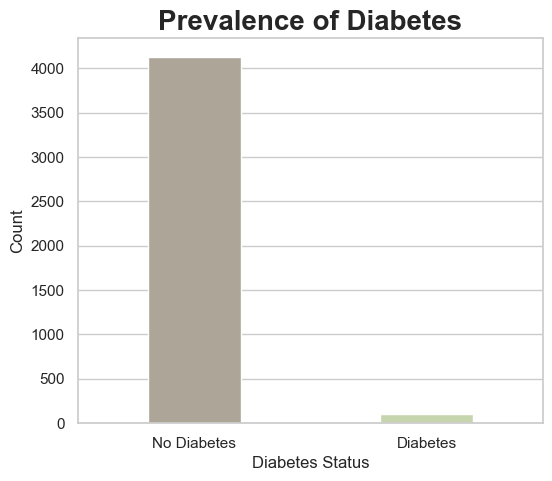

In [126]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x=df['diabetes'], palette=['#B0A695','#C7DCA7'], width=0.4)
ticks = plt.xticks()[0]
labels = ['No Diabetes', 'Diabetes']
plt.xticks(ticks, labels)
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes', fontsize=20, fontweight='bold')
plt.show()

- **Inspecting totChol column**

In [127]:
df['totChol'].value_counts()

totChol
240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: count, Length: 248, dtype: int64

In [128]:
df['totChol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [129]:
df['totChol'].nunique()

248

In [130]:
print('Total Null values are:',df['totChol'].isnull().sum())
print('The minimum  level of cholestrol is:', df['totChol'].min())
print('The maximum  level of cholestrol is:', df['totChol'].max())
print('Average level of cholestrol is:',df['totChol'].mean())
print('Median level of cholestrol is:',df['totChol'].median())

Total Null values are: 50
The minimum  level of cholestrol is: 107.0
The maximum  level of cholestrol is: 696.0
Average level of cholestrol is: 236.69952267303103
Median level of cholestrol is: 234.0


In [131]:
# By using Scikit-learn's SimpleImputer, we can replace the missing values with the mean of the column.
fillMissValues=SimpleImputer(strategy='mean')
df['totChol']=fillMissValues.fit_transform(df[['totChol']])

# By using pandas, we can replace the missing values with the median of the column.

# df['totChol'].fillna(df['totChol'].mean(),inplace=True)


In [132]:
df['totChol'].isnull().sum()

0

- **Inspecting sysBP column**

In [133]:
df['sysBP'].value_counts()

sysBP
120.0    107
130.0    102
110.0     96
115.0     89
125.0     88
        ... 
169.5      1
98.5       1
181.5      1
188.5      1
207.0      1
Name: count, Length: 234, dtype: int64

In [134]:
df['sysBP'].isnull().sum()

0

- **Inspecting diaBP column**

In [135]:
df['diaBP'].value_counts()

diaBP
80.0     262
82.0     152
85.0     137
70.0     135
81.0     131
        ... 
132.0      1
54.0       1
142.5      1
116.5      1
127.5      1
Name: count, Length: 146, dtype: int64

- **Inspecting BMI column**

In [136]:
df['BMI'].value_counts()

BMI
22.91    18
23.48    18
22.54    18
22.19    18
25.09    16
         ..
29.14     1
38.43     1
42.15     1
28.10     1
20.91     1
Name: count, Length: 1364, dtype: int64

In [137]:
print('Total Null values are:', df['BMI'].isnull().sum())
print('The minimum BMI value is:', df['BMI'].min())
print('The maximum BMI value is:', df['BMI'].max())
print('Average BMI value is:', df['BMI'].mean())

Total Null values are: 19
The minimum BMI value is: 15.54
The maximum BMI value is: 56.8
Average BMI value is: 25.80080075811419


In [138]:
# By using Scikit-learn's SimpleImputer, we can replace the missing values with the mean of the column.
fillMissValues=SimpleImputer(strategy='mean')
df['BMI']=fillMissValues.fit_transform(df[['BMI']])

# By using pandas, we can replace the missing values with the median of the column.
# df['BMI'].fillna(df['BMI'].mean(),inplace=True)

In [139]:
df['BMI'].isnull().sum()

0

- **Inspecting heartRate column**

In [140]:
df['heartRate'].value_counts()

heartRate
75.0     563
80.0     385
70.0     305
60.0     231
85.0     228
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: count, Length: 73, dtype: int64

In [141]:
print('Total Null values are:', df['heartRate'].isnull().sum())
print('The minimum heart rate value is:', df['heartRate'].min())
print('The maximum heart rate value is:', df['heartRate'].max())
print('Average heart rate value is:', df['heartRate'].mean())

Total Null values are: 1
The minimum heart rate value is: 44.0
The maximum heart rate value is: 143.0
Average heart rate value is: 75.87898089171975


In [142]:
# By using Scikit-learn's SimpleImputer, we can replace the missing values with the mean of the column.
fillMissValues=SimpleImputer(strategy='mean')
df['heartRate']=fillMissValues.fit_transform(df[['heartRate']])

# By using pandas, we can replace the missing values with the median of the column.
# df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)

In [143]:
df['heartRate'].isnull().sum()

0

- **Inspecting glucose column**

In [144]:
df['glucose'].value_counts()

glucose
75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: count, Length: 143, dtype: int64

In [145]:
print('Total Null values are:', df['glucose'].isnull().sum())
print('The minimum glucose level is:', df['glucose'].min())
print('The maximum glucose level is:', df['glucose'].max())
print('Average glucose level is:', df['glucose'].mean())

Total Null values are: 388
The minimum glucose level is: 40.0
The maximum glucose level is: 394.0
Average glucose level is: 81.96365524402907


In [146]:
# By using Scikit-learn's SimpleImputer, we can replace the missing values with the mean of the column.
fillMissValues=SimpleImputer(strategy='mean')
df['glucose']=fillMissValues.fit_transform(df[['glucose']])

# By using pandas, we can replace the missing values with the median of the column.
# df['glucose'].fillna(df['glucose'].mean(),inplace=True)

In [147]:
df.rename(columns={'TenYearCHD': 'target'}, inplace=True)

In [148]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

In [149]:
df.isnull().sum()/len(df)*100

male               0.0
age                0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
target             0.0
dtype: float64

All missing values have been imputed. The dataset no longer contains any missing data, as indicated by the percentage of zeros across all variables in the table above.

- ## **Handling Outliers**

In [150]:
fig = go.Figure()


fig.add_trace(go.Box(y=df['age'], name='Age'))
fig.add_traces(go.Box(y=df['cigsPerDay'], name='Cigarettes Per Day'))
fig.add_trace(go.Box(y=df['totChol'], name='Total Cholesterol'))
fig.add_trace(go.Box(y=df['sysBP'], name='Systolic Blood Pressure')) 
fig.add_trace(go.Box(y=df['diaBP'], name='Diastolic Blood Pressure'))


fig.add_trace(go.Box(y=df['BMI'], name='Body Mass Index (BMI)'))
fig.add_trace(go.Box(y=df['heartRate'], name='Heart Rate'))
fig.add_trace(go.Box(y=df['glucose'], name='Glucose'))


fig.update_layout(
    title="Boxplots of Health Metrics",
    yaxis_title="Value",
    boxmode='group'
)


fig.show()


The box plots after capping the outliers show that the extreme values have been reduced. The data now appears to have fewer outliers, which should help in creating more robust machine learning models.

- ## **Handling Duplicates**

In [151]:
df.duplicated().sum()

0

It means there is no duplicate value in data.

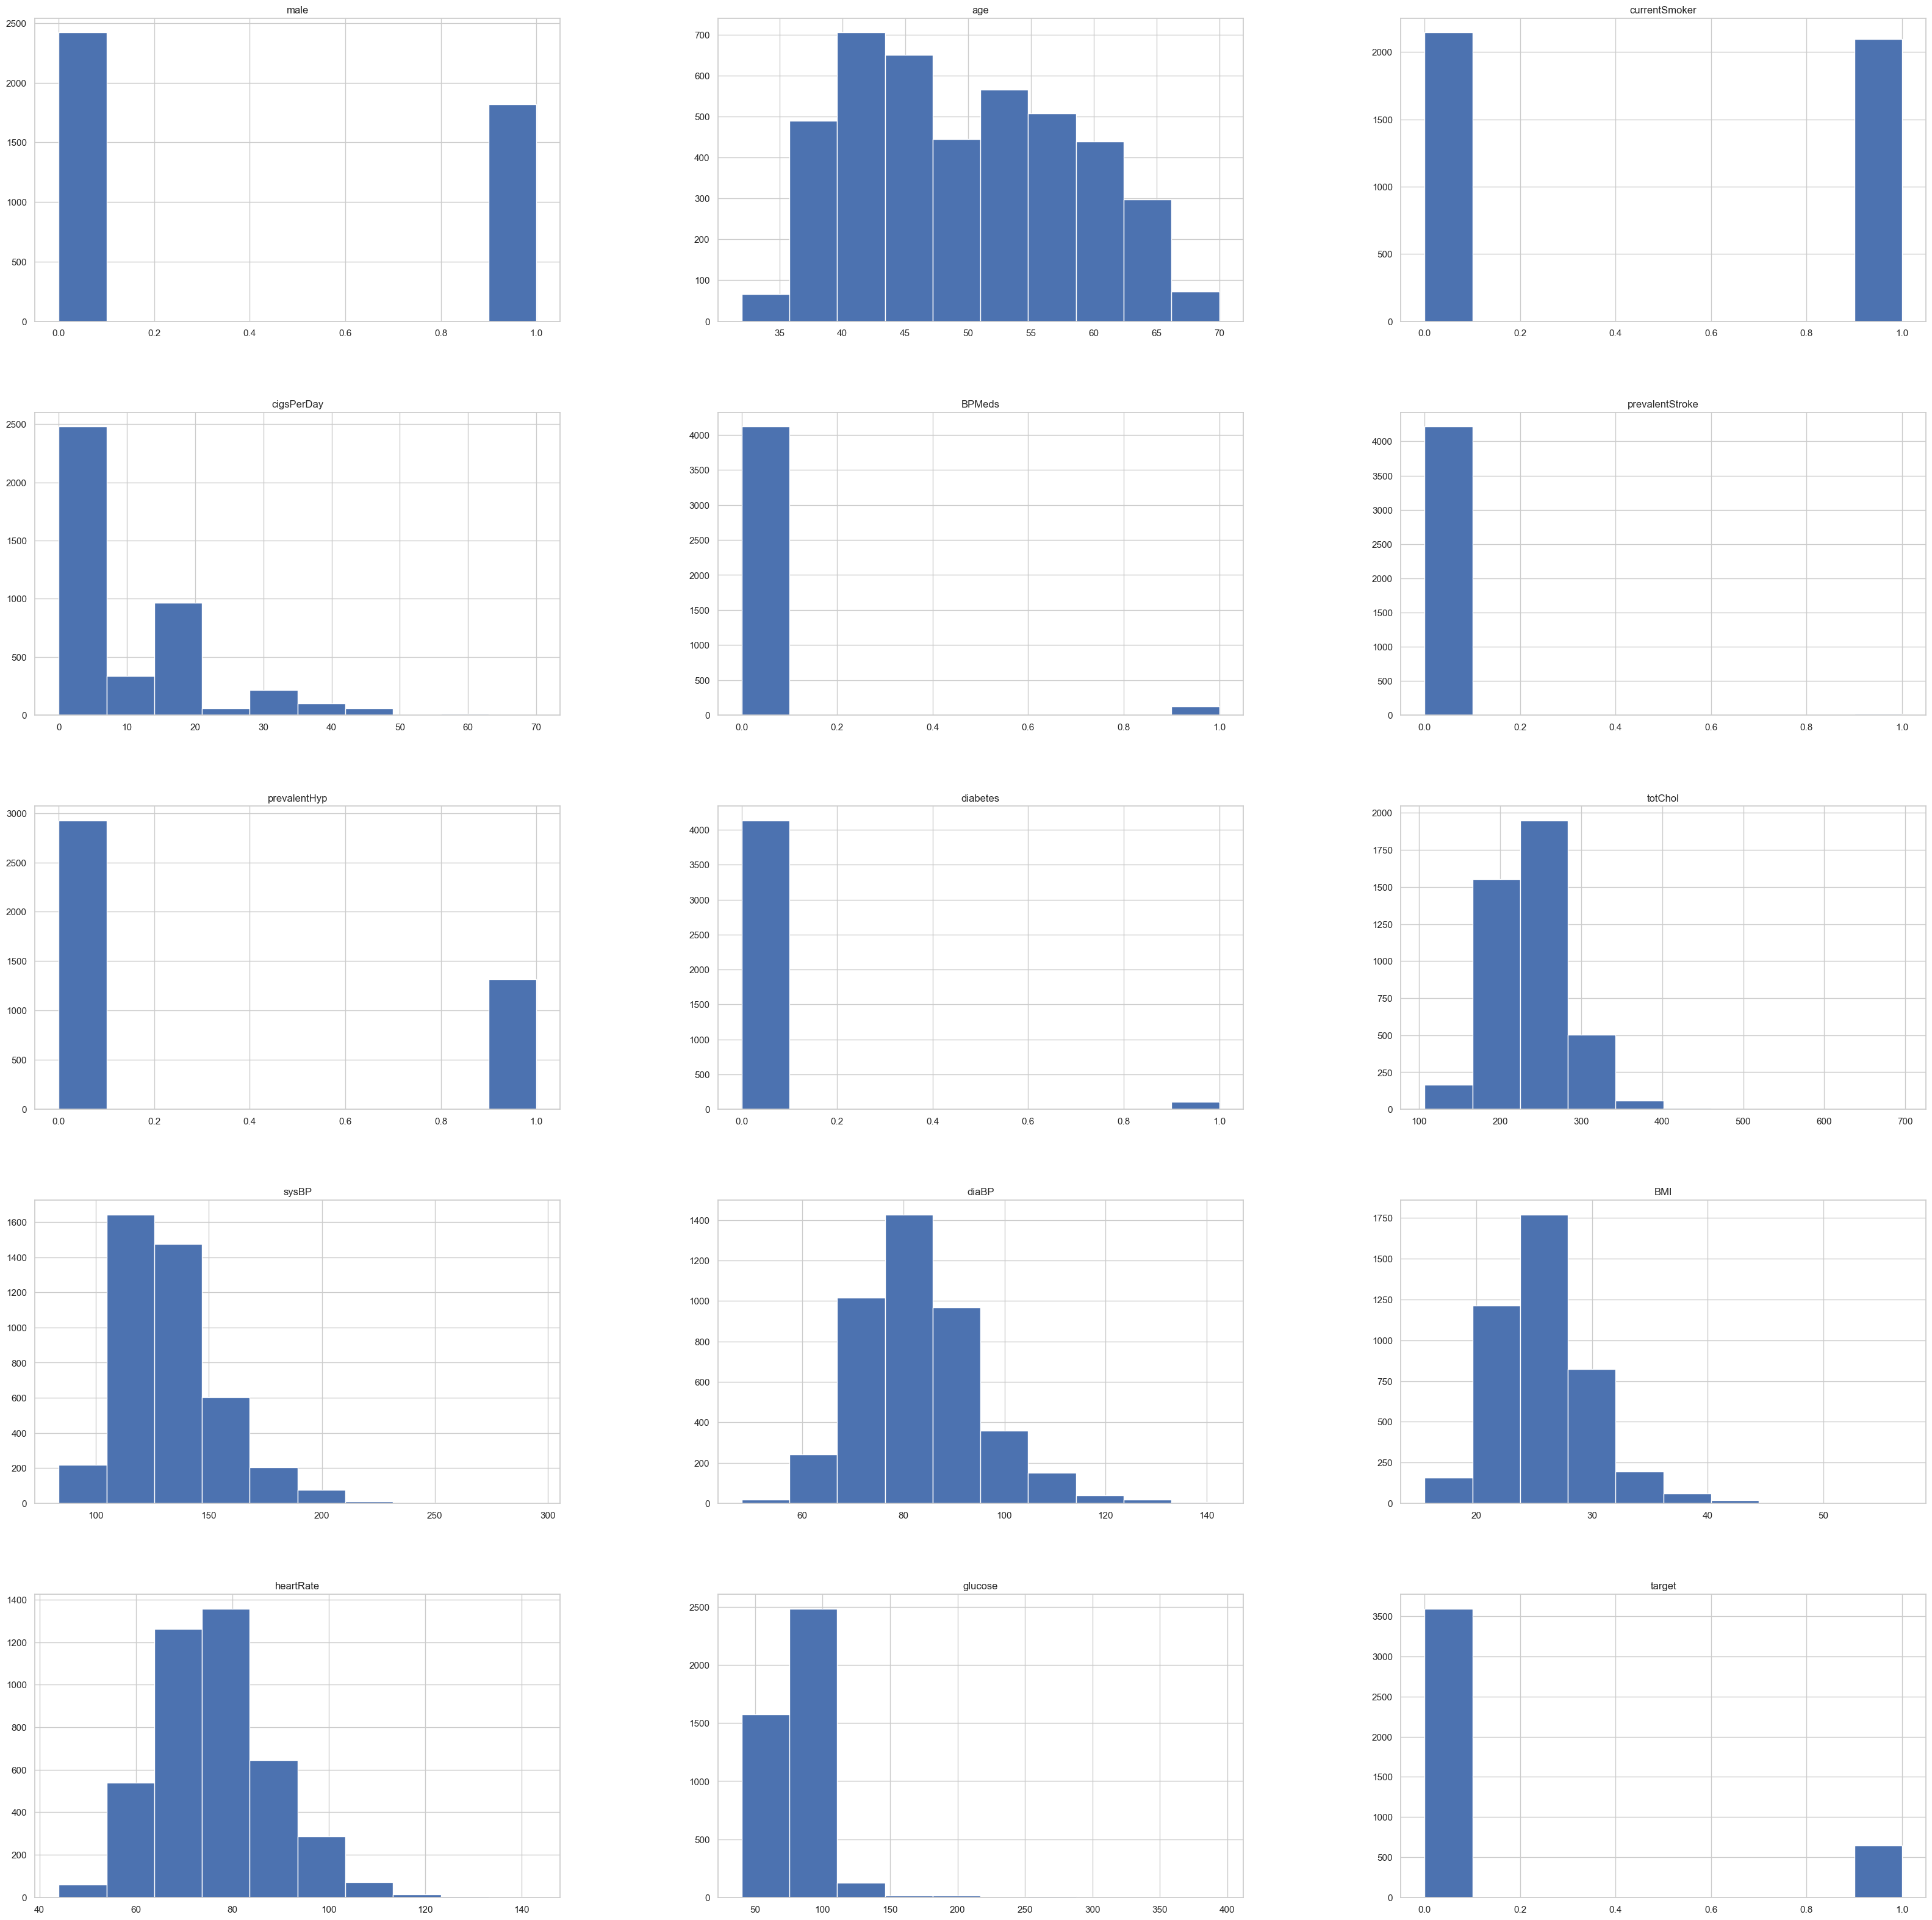

In [152]:
df.hist(figsize=(40,40),layout=(5,3))
plt.show()

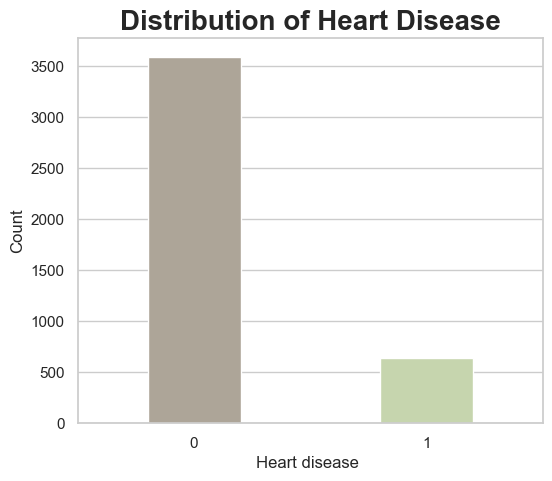

In [153]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df,x='target', palette=['#B0A695','#C7DCA7'],width=0.4)
plt.xlabel('Heart disease ')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease', fontsize=20, fontweight='bold')
plt.show()

<Figure size 600x500 with 0 Axes>

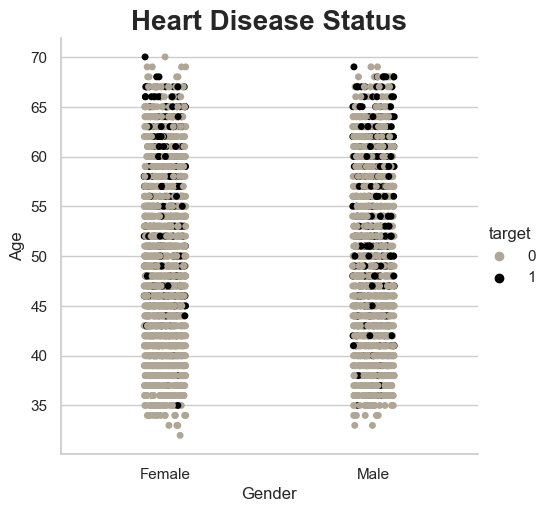

In [154]:

plt.figure(figsize=(6, 5))
sns.catplot(data=df,x='male',y='age',hue='target',palette=['#B0A695','black'])
ticks = plt.xticks()[0]
labels = ['Female', 'Male']
plt.xticks(ticks, labels)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Heart Disease Status', fontsize=20, fontweight='bold')
plt.show()

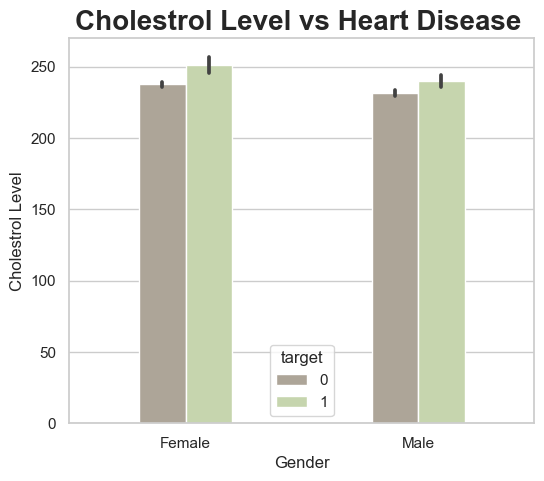

In [155]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df,x='male',y='totChol',hue='target',palette=['#B0A695','#C7DCA7'],width=0.4)
ticks = plt.xticks()[0]
labels = ['Female', 'Male']
plt.xticks(ticks, labels)
plt.xlabel('Gender')
plt.ylabel('Cholestrol Level')
plt.title('Cholestrol Level vs Heart Disease ', fontsize=20, fontweight='bold')
plt.show()

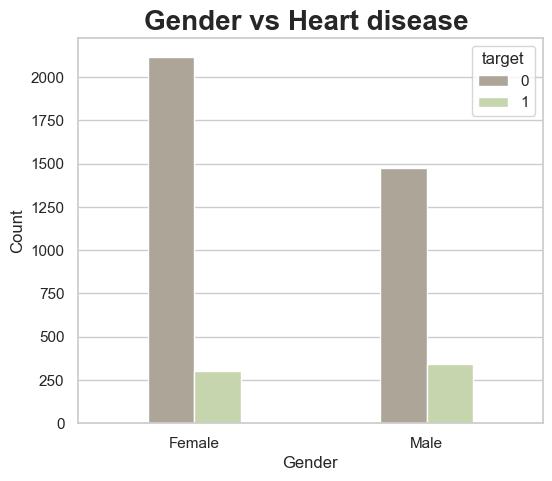

In [156]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x=df['male'], hue='target',palette=['#B0A695','#C7DCA7'],width=0.4)
ticks = plt.xticks()[0]
labels = ['Female','Male']
plt.xticks(ticks, labels)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Heart disease ',fontsize=20, fontweight='bold')
plt.show()

- ## **Feature Enginnering**

In [157]:
#Feature scaling
# from sklearn.preprocessing import StandardScaler

# Initialize the scaler
# scaler = StandardScaler()

# Select numerical columns for scaling
# numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Scale the numerical columns
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# df.head()


The numerical columns have been successfully scaled using standardization, which centers the data around zero and scales it according to standard deviation. This is a common preprocessing step for many machine learning algorithms.
The output also indicates that there are no categorical columns requiring encoding, as the list of categorical columns is empty. This means all features are now either numerical or have been appropriately handled.


In [158]:
# Visualize the distribution of numerical features after preprocessing
# fig, axes = plt.subplots(3, 3, figsize=(18, 12))
# fig.suptitle('Distribution of Numerical Features after Preprocessing', fontsize=16)
# Plot the distributions
# for i, column in enumerate(numerical_columns):
#     sns.histplot(df[column], kde=True, ax=axes[i//3, i%3])
#     axes[i//3, i%3].set_title(column)
# Hide empty subplots
# for i in range(len(numerical_columns), 3*3):
#     fig.delaxes(axes.flatten()[i])
# plt.tight_layout()
# plt.show()

The histograms above display the distribution of the numerical features after preprocessing, including standardization. Each subplot represents a different feature, showing its frequency distribution and density estimate. These plots provide a visual confirmation that the data has been centered and scaled, which is beneficial for many machine learning algorithms



- ## **EDA**

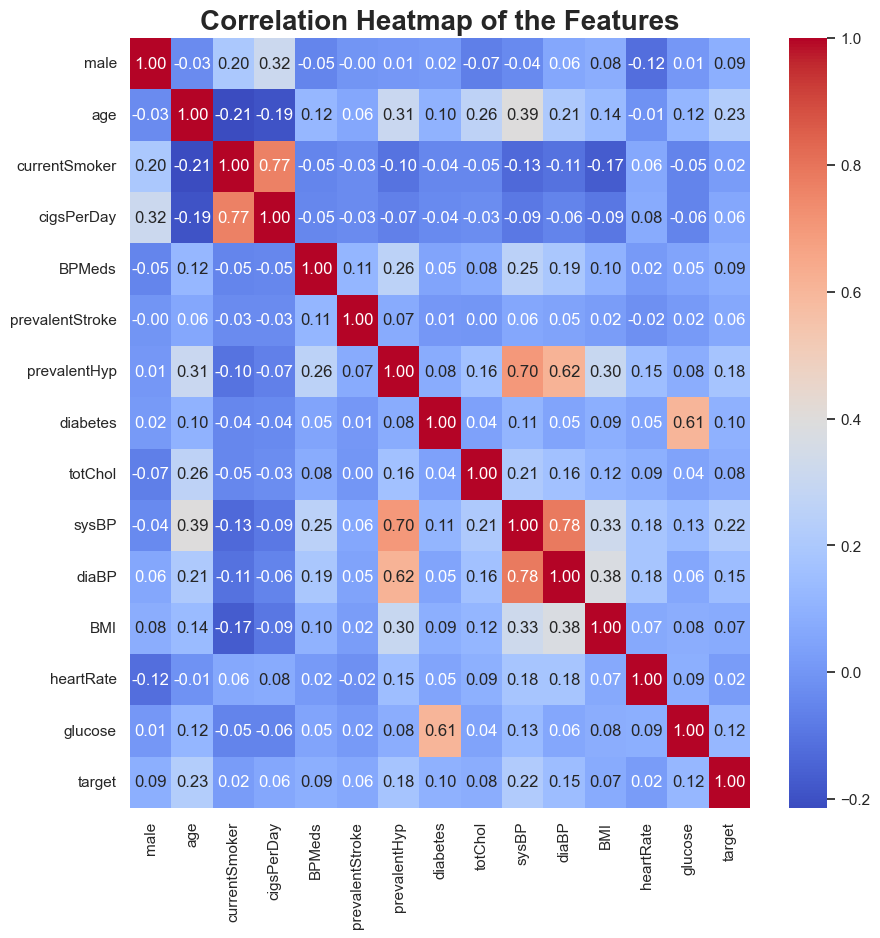

In [159]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of the Features', fontsize=20, fontweight='bold')
plt.show()

The correlation heatmap above provides a visual representation of the relationships between all features in the dataset. Each cell in the heatmap shows the correlation coefficient between two variables, indicating how strongly they are related. A positive value indicates a positive correlation, while a negative value indicates a negative correlation. The strength of the correlation is indicated by the color intensity





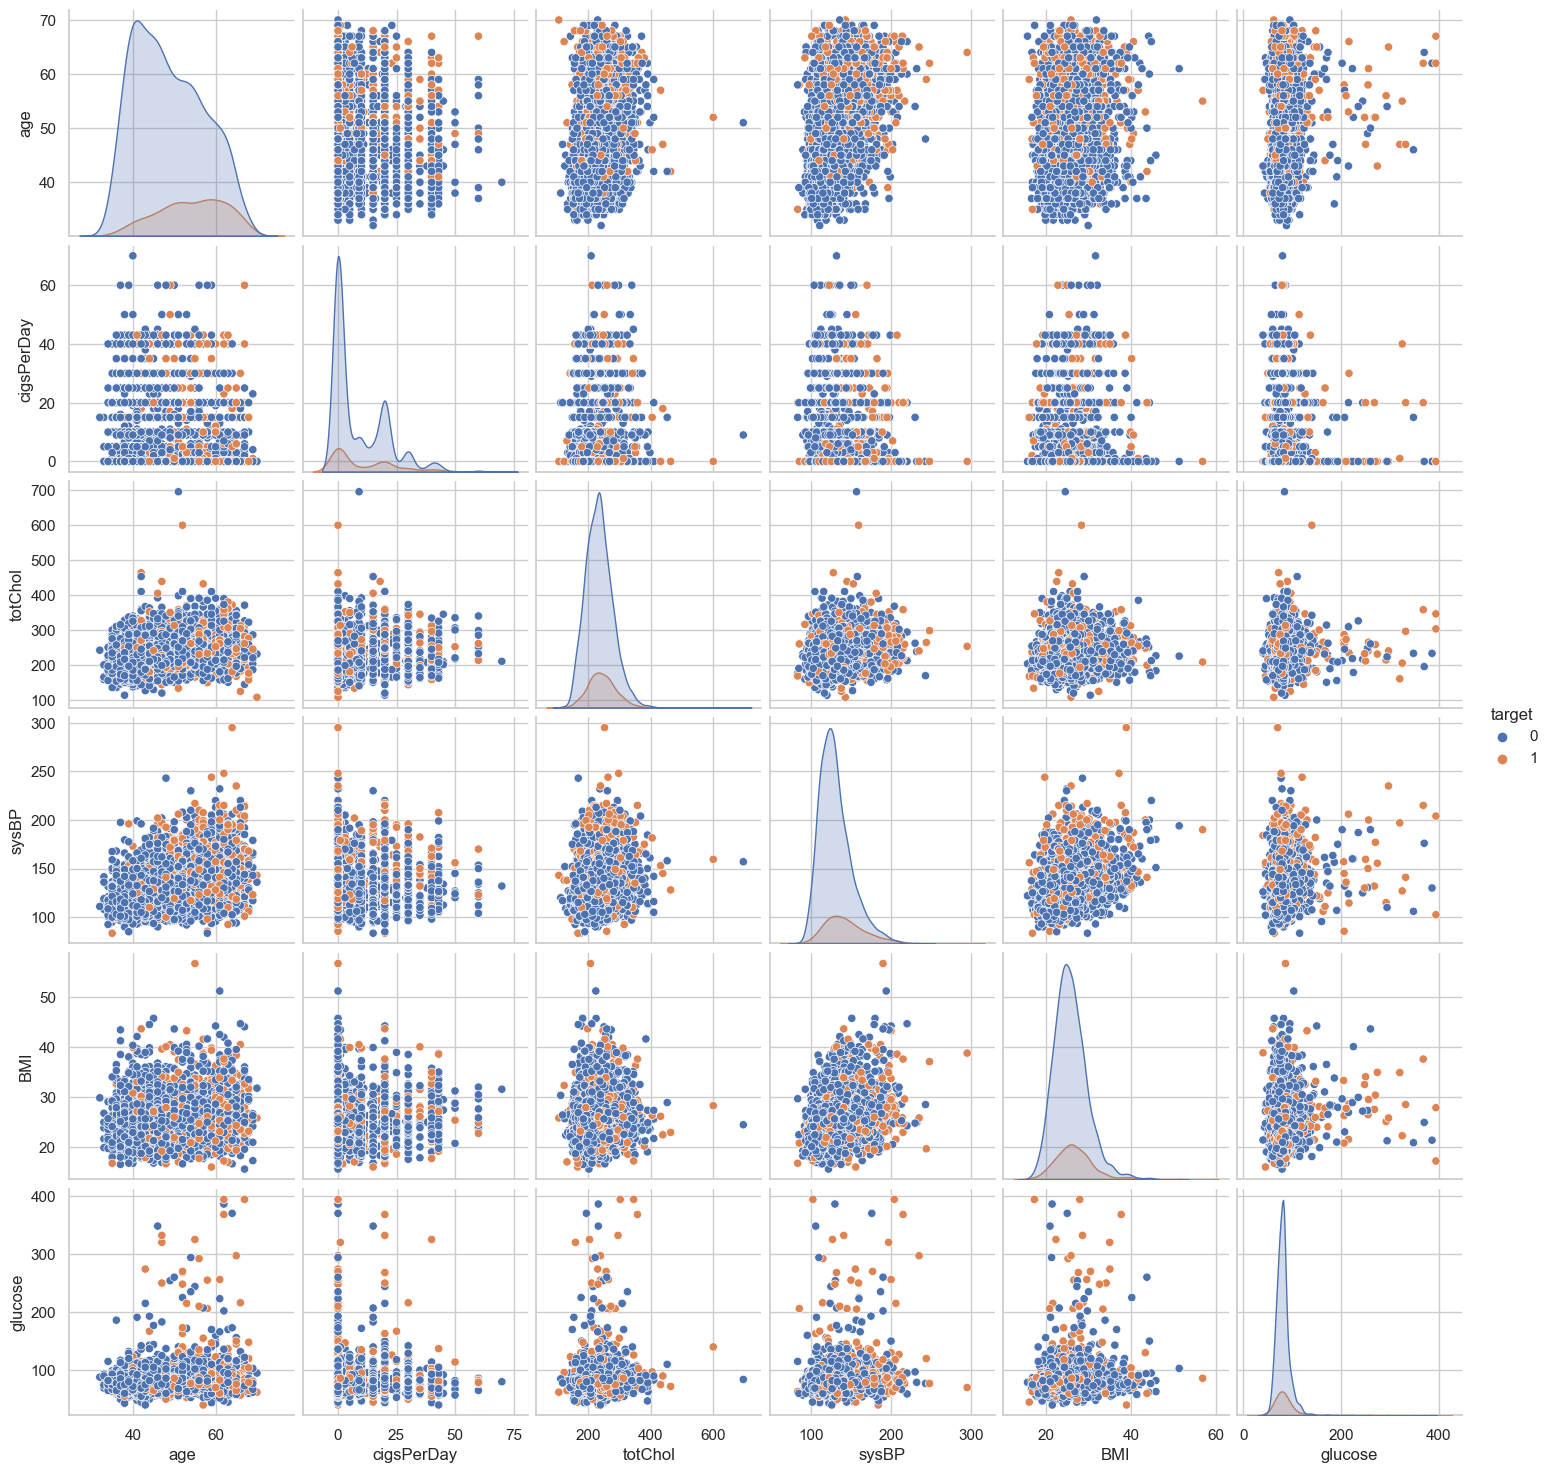

In [160]:
# Pairplot for a subset of features against the target variable 'TenYearCHD'
sns.pairplot(df, vars=['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'glucose'], hue='target')
plt.show()

# **3) Data Splitting**

In [161]:
X=df.drop(['target'],axis=1)
Y=df['target']

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [163]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3392, 14) (848, 14) (3392,) (848,)


The data has been successfully split into training and testing sets, with 80% allocated for training and 20% for testing. The head of both the training and testing feature sets are displayed above.





# **4) Modal Traning**

In [164]:
lr = LogisticRegression(max_iter=2000,solver='liblinear')
model = lr.fit(x_train, y_train)


In [165]:
preds = model.predict(x_test)

In [166]:
accuracy = accuracy_score(y_test, preds)
print('Accuracy on test data:', (accuracy*100), '%')

Accuracy on test data: 85.84905660377359 %


In [167]:
report=classification_report(y_test,preds,target_names=['No Disease','Disease'])
print(report)

              precision    recall  f1-score   support

  No Disease       0.86      0.99      0.92       725
     Disease       0.62      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.81       848



In [168]:
cv_scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

mean_cv_score, std_cv_score


(0.8533018867924529, 0.0048103957675403606)

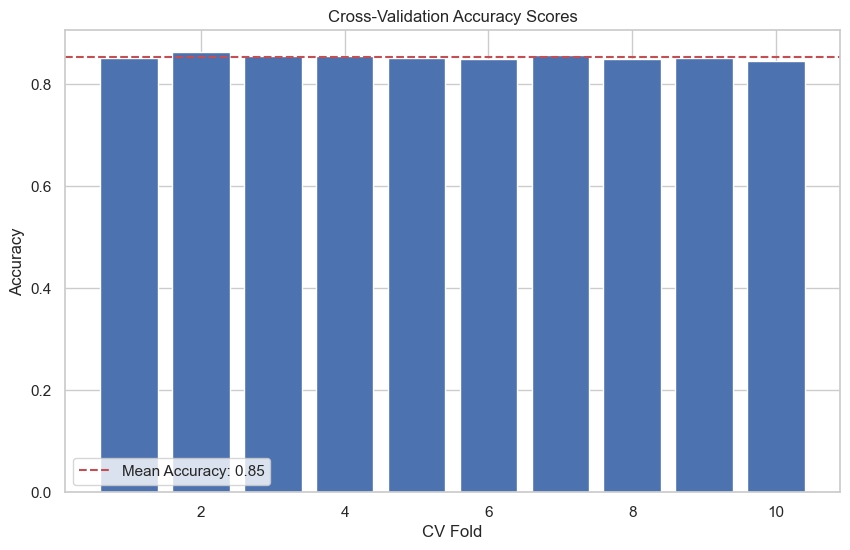

In [169]:
plt.figure(figsize=(10, 6))
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('CV Fold')
plt.ylabel('Accuracy')
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.axhline(y=mean_cv_score, color='r', linestyle='--', label=f'Mean Accuracy: {mean_cv_score:.2f}')
plt.legend()
plt.show()

In [170]:
model_filename = 'My_Project.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
    